# 1. Fetch data

In [3]:
import pandas as pd

In [6]:
covid = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
covid.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,154361,154487,154487,154487,154585,154712,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,160365,161324,162173,162953,163404,164276,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,200989,201224,201425,201600,201766,201948,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15113,15124,15124,15124,15140,15140,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51827,52208,52307,52307,52644,52968,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2304,2603,2603,2603,2603,2603,2625,2815,2815,2902,2923,2923,3160,3188,3231,3336,3403,3503,3503,3518,3581,3663,3678,3738,3750,3750,3772,3817,3830,3858,3888,3888,3918,3918,3939,3984,3994,4019,4019,4031
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5234851,5237159,5238610,5239232,5241394,5243231,5245265,5246998,5248847,5249840,5250402,5251940,5253765,5255261,5256902,5258466,5259352,5259738,5260719,5261935,5263219,5264305,5265058,5265528,5265859,5266275,5267339,5268653,5270003,5271361,5272151,5272551,5273463,5274766,5275984,5277525,5278910,5279818,5280358,5281585
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,251323,252082,253093,253600,253942,254436,254709,255648,256554,257620,258545,259007,259779,260675,261697,262631,263783,264690,265317,266208,267363,268672,269874,271205,272356,272957,273860,275077,276666,278431,280294,281991,283183,284237,286303,288906,291052,293014,295368,296552
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,710,725,742,749,765,782,798,817,849,874,893,906,928,959,1011,1063,1101,1129,1162,1190,1231,1271,1296,1326,1358,1386,1437,1483,1518,1538,1571,1588,1612,1636,1664,1677,1701,1710,1719,17

# 2. Prepare data

1. Look for outliers e.g., notice any repeated names
2. Combine repeated entries via grouping and adding 
3. Ensure each column is represented by a country or state

In [7]:
covid = covid.drop(columns=["Province/State", "Lat", "Long"])
covid.head(20)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,...,154361,154487,154487,154487,154585,154712,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,160365,161324,162173,162953,163404,164276,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,200989,201224,201425,201600,201766,201948,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15113,15124,15124,15124,15140,15140,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51827,52208,52307,52307,52644,52968,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2304,2603,2603,2603,2603,2603,2625,2815,2815,2902,2923,2923,3160,3188,3231,3336,3403,3503,3503,3518,3581,3663,3678,3738,3750,3750,3772,3817,3830,3858,3888,3888,3918,3918,3939,3984,3994,4019,4019,4031
6,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5234851,5237159,5238610,5239232,5241394,5243231,5245265,5246998,5248847,5249840,5250402,5251940,5253765,5255261,5256902,5258466,5259352,5259738,5260719,5261935,5263219,5264305,5265058,5265528,5265859,5266275,5267339,5268653,5270003,5271361,5272151,5272551,5273463,5274766,5275984,5277525,5278910,5279818,5280358,5281585
7,Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,251323,252082,253093,253600,253942,254436,254709,255648,256554,257620,258545,259007,259779,260675,261697,262631,263783,264690,265317,266208,267363,268672,269874,271205,272356,272957,273860,275077,276666,278431,280294,281991,283183,284237,286303,288906,291052,293014,295368,296552
8,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,710,725,742,749,765,782,798,817,849,874,893,906,928,959,1011,1063,1101,1129,1162,1190,1231,1271,1296,1326,1358,1386,1437,1483,1518,1538,1571,1588,1612,1636,1664,1677,1701,1710,1719,1731
9,Australia,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,49611,50919,51986,52922,53898,54919,55962,56988,57983,58931,59709,60561,61420,62353,63212,6401

In [8]:
# (optionally) Remove columns where none of the cells exceed the value of 10 (it usually means insufficient reporting)
# covid = covid.loc[:, (covid != 0).any(axis=0)]

In [9]:
covid = covid.groupby(["Country/Region"]).sum()
covid.head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,154361,154487,154487,154487,154585,154712,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,160365,161324,162173,162953,163404,164276,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,200989,201224,201425,201600,201766,201948,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15113,15124,15124,15124,15140,15140,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51827,52208,52307,52307,52644,52968,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2304,2603,2603,2603,2603,2603,2625,2815,2815,2902,2923,2923,3160,3188,3231,3336,3403,3503,3503,3518,3581,3663,3678,3738,3750,3750,3772,3817,3830,3858,3888,3888,3918,3918,3939,3984,3994,4019,4019,4031
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5234851,5237159,5238610,5239232,5241394,5243231,5245265,5246998,5248847,5249840,5250402,5251940,5253765,5255261,5256902,5258466,5259352,5259738,5260719,5261935,5263219,5264305,5265058,5265528,5265859,5266275,5267339,5268653,5270003,5271361,5272151,5272551,5273463,5274766,5275984,5277525,5278910,5279818,5280358,5281585
Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,251323,252082,253093,253600,253942,254436,254709,255648,256554,257620,258545,259007,259779,260675,261697,262631,263783,264690,265317,266208,267363,268672,269874,271205,272356,272957,273860,275077,276666,278431,280294,281991,283183,284237,286303,288906,291052,293014,295368,296552
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,...,82200,84056,85628,87128,88710,90369,92178,93942,95807,97559,99031,100911,102723,105123,107181,109516,111388,113411,115800,117826,120042,122566,125081,127471,129567,131415,133444,136188,138720,141031,143204,145263,147301,149398,151942,154489,156372,158546,1

In [ ]:
covid = covid.T
covid.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


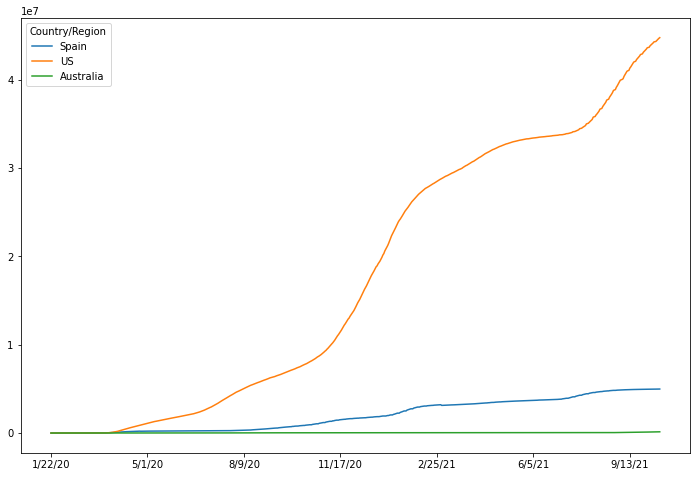

In [ ]:
states = ["Spain", "US", "Australia"]
covid[states].plot(figsize = (12, 8))

# 3. Detect delta in reported cases

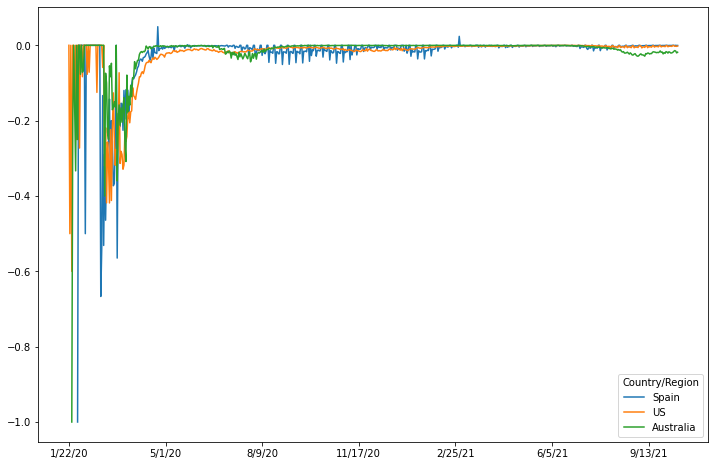

In [ ]:
# Verify whether percentage change function works
states = ["Spain", "US", "Australia"]
covid[states].pct_change(periods=-1).plot(figsize = (12, 8))

In [ ]:
covid_pct_change = covid.pct_change()
covid_pct_change.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
10/10/21,0.000270,0.001861,0.000523,0.000000,0.002172,0.003210,0.000063,0.004244,0.016443,0.002205,0.002101,0.0,0.000207,0.000308,0.023531,0.003561,0.000000,0.000000,0.000000,0.000000,0.000602,0.000000,0.000000,0.000401,0.044307,0.001194,0.002559,0.002761,0.000000,0.000475,0.002086,0.000000,0.000958,0.000000,0.000000,0.000640,0.000230,0.000305,0.000961,0.00000,...,0.000000,0.0,0.022625,0.002738,0.001625,0.0,0.017656,0.000223,0.000000,0.000000,0.001370,0.000000,0.0,0.000000,0.000000,0.000000,0.006537,0.000430,0.0,0.000000,0.006363,0.000610,0.000699,0.004726,0.000533,0.003825,0.000501,0.000819,0.004574,0.000150,0.004125,0.000264,0.002390,0.0,0.002904,0.004219,0.000000,0.002568,0.000053,0.000258
10/11/21,0.000206,0.001114,0.000479,0.001046,0.003291,0.000000,0.000079,0.002207,0.014263,0.001734,0.001241,0.0,0.000290,0.000383,0.019601,0.003484,0.004330,0.000000,0.000000,0.000000,0.000766,0.004719,0.004506,0.000321,0.020824,0.006664,0.001449,0.002501,0.011344,0.000370,0.002247,0.000000,0.000661,0.000000,0.000395,0.000571,0.000175,0.000219,0.000240,0.00000,...,0.001979,0.0,0.017824,0.000945,0.000617,0.0,0.000000,0.000069,0.000826,0.000770,0.001294,0.000077,0.0,0.000813,0.000000,0.002671,0.007469,0.000675,0.0,0.000000,0.005865,0.000102,0.000388,0.002257,0.000045,0.004105,0.002621,0.000722,0.003614,0.000168,0.004850,0.000197,0.002121,0.0,0.003370,0.004310,0.004264,0.003522,0.000029,0.000599
10/12/21,0.000379,0.002860,0.000464,0.000000,0.003475,0.005867,0.000202,0.003308,0.015440,0.001823,0.002591,0.0,0.000250,0.000347,0.030722,0.003641,0.001926,0.000000,0.000000,0.000000,0.000952,0.002981,0.000000,0.000341,0.033272,0.006616,0.002067,0.002880,0.003999,0.000475,0.002320,0.000000,0.004674,0.000000,0.000000,0.000366,0.000239,0.000216,0.000720,0.02845,...,0.001378,0.0,0.023029,0.003542,0.003348,0.0,0.000000,0.000203,0.001651,0.000000,0.001273,0.001468,0.0,0.012797,0.001501,0.001089,0.007521,0.000245,0.0,0.002966,0.005488,0.000305,0.000737,0.002876,0.000324,0.004530,0.002391,0.000577,0.004788,0.000184,0.004598,0.000305,0.001954,0.0,0.000000,0.003497,0.002170,0.001064,0.000205,0.001069
10/13/21,0.000180,0.002892,0.000537,0.000457,0.005648,0.011930,0.000249,0.004444,0.020563,0.003422,0.002560,0.0,0.000214,0.000331,0.027105,0.003667,0.002890,0.034254,0.009246,0.000765,0.001102,0.002162,0.000000,0.000364,0.020376,0.006304,0.002750,0.003269,0.005534,0.000818,0.002358,0.031478,0.001615,0.005964,0.000395,0.000441,0.000267,0.000252,0.000959,0.00000,...,0.001239,0.0,0.024129,0.005628,0.004057,0.0,0.000000,0.000323,0.002802,0.000554,0.001289,0.006044,0.0,0.016023,0.000780,0.001231,0.007598,0.000245,0.0,0.000000,0.005816,0.000457,0.000736,0.004094,0.000318,0.004161,0.002726,0.000449,0.006380,0.000171,0.005038,0.000410,0.002151,0.0,0.003338,0.004090,0.001819,0.002869,0.000072,0.000697
10/14/21,0.000353,0.002810,0.000512,0.000784,0.003894,0.003406,0.000256,0.005777,0.018592,0.002830,0.002923,0.0,0.000181,0.000298,0.027153,0.003640,0.002791,0.035517,0.000000,0.000382,0.000000,0.003097,0.003338,0.000662,0.016865,0.005993,0.003702,0.003136,0.003704,0.000659,0.002318,0.000000,0.001881,0.000000,0.000395,0.000715,0.000055,0.000279,0.000719,0.00000,...,0.001283,0.0

## Changes in 60 days

In [ ]:
result = covid_pct_change.tail(60).sum()
result = result.fillna(0) # fill all non-zero values e.g. NaN with zeros
result.head()

Country/Region
Afghanistan    0.023725
Albania        0.262656
Algeria        0.090643
Andorra        0.026595
Angola         0.336586
dtype: float64

In [ ]:
# result is a pandas series object, we will convert to dataframe due to our familiarity 
result = result.reset_index()
result.head()

,Country/Region,0
0,Afghanistan,0.023725
1,Albania,0.262656
2,Algeria,0.090643
3,Andorra,0.026595
4,Angola,0.336586


In [ ]:
# result = result.fillna(0) # fill all empty or NaN cells with zero
result = result.sort_values(by=0) # sort the result by column "0"
result = result[result[0] != 0.0] # remove all columns where delta is zero (possibly data is inaccurate)
result.head(10)

,Country/Region,0
137,Paraguay,0.007866
156,Sierra Leone,0.008481
132,Oman,0.012684
94,Kuwait,0.013897
140,Poland,0.015729
34,Chad,0.016531
46,Czechia,0.016698
19,Bhutan,0.017366
12,Bahrain,0.018265
106,Madagascar,0.018765


## Visualize results

### Top-10 better countries

In [ ]:
import plotly.express as px
px.bar(result.head(10), y=0, x="Country/Region", color="Country/Region")

### Top-10 worst countries

In [ ]:
px.bar(result.tail(10), y=0, x="Country/Region", color="Country/Region")